In [1]:
from mpl_toolkits import mplot3d
from matplotlib.pylab import *

In [2]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='k')
rc('figure', facecolor='k')
rc('figure', figsize=(10,5))

In [3]:
# Lanes from -1 to 3 --> 0 is target lane
y = r_[-1:3.1:.1]

# 2 lane widths in front and in back
x = r_[-2:2.1:.1]

In [4]:
# Target lane cost
# target_lane_cost = y ** 2 / 4
target_lane_cost = abs(y) * .5

In [5]:
# Color shorthands
r, g, b, p = 'C1', 'C3', 'C0', 'C2'
set_color = lambda c: dict(linefmt=c, basefmt=" ", markerfmt='o'+c)

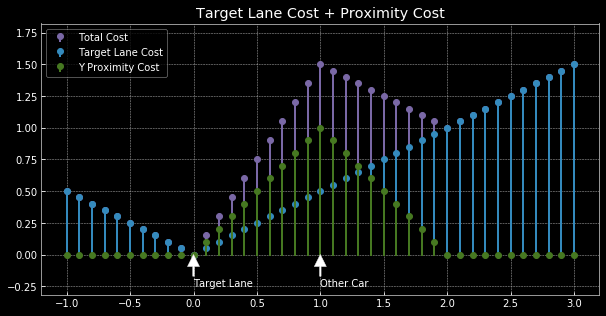

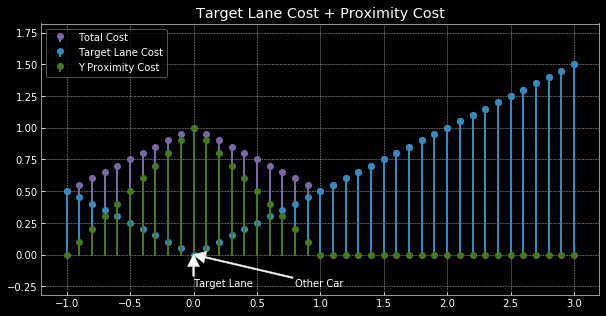

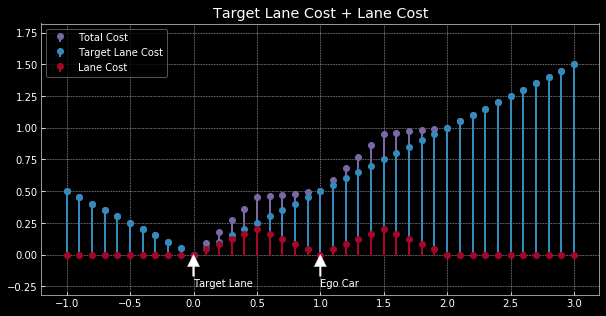

In [8]:
# Target Lane 0, Ego Car Lane 2, Other Car Lane 1
figure()
y_proximity = maximum(1 - abs(1 - y), 0)
stem(y, target_lane_cost + y_proximity, **set_color(p), label='Total Cost')
stem(y, target_lane_cost, **set_color(b), label='Target Lane Cost')
stem(y, y_proximity, **set_color(g), label='Y Proximity Cost')
arrow_props = dict(width=1.5, facecolor='white')
# annotate('Ego Car', (2.0, 0.0), (2, -0.25), arrowprops=arrow_props)
annotate('Other Car', (1.0, 0.0), (1, -0.25), arrowprops=arrow_props)
annotate('Target Lane', (0.0, 0.0), (0, -0.25), arrowprops=arrow_props)
axis('equal')
title('Target Lane Cost + Proximity Cost')
legend()
savefig('car_1_left.png')

# Target Lane 0, Ego Car Lane 2, Other Car Lane 0
figure()
y_proximity = maximum(1 - abs(0 - y), 0)
stem(y, target_lane_cost + y_proximity, **set_color(p), label='Total Cost')
stem(y, target_lane_cost, **set_color(b), label='Target Lane Cost')
stem(y, y_proximity, **set_color(g), label='Y Proximity Cost')
# annotate('Ego Car', (2.0, 0.0), (2, -0.25), arrowprops=arrow_props)
annotate('Other Car', (0.0, 0.0), (0.8, -0.25), arrowprops=arrow_props)
annotate('Target Lane', (0.0, 0.0), (0, -0.25), arrowprops=arrow_props)
axis('equal')
title('Target Lane Cost + Proximity Cost')
legend()
savefig('car_2_left.png')

# Target Lane 0, Ego Car Lane 1, Lane Cost accounted for
figure()
lane_cost = (maximum(0.5 - abs(0.5 - y), 0) + maximum(0.5 - abs(1.5 - y), 0)) * 0.4
stem(y, target_lane_cost + lane_cost, **set_color(p), label='Total Cost')
stem(y, target_lane_cost, **set_color(b), label='Target Lane Cost')
stem(y, lane_cost, **set_color(r), label='Lane Cost')
annotate('Ego Car', (1.0, 0.0), (1, -0.25), arrowprops=arrow_props)
annotate('Target Lane', (0.0, 0.0), (0, -0.25), arrowprops=arrow_props)
axis('equal')
title('Target Lane Cost + Lane Cost')
legend();
savefig('lane_change.png')

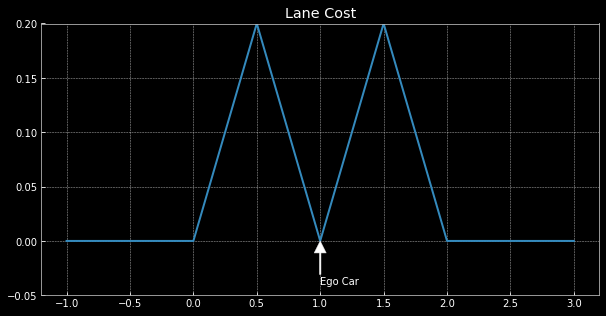

In [9]:
figure()
plot(y, lane_cost)
ylim(-0.05, 0.2)
annotate('Ego Car', (1.0, 0.0), (1, -0.04), arrowprops=arrow_props)
title('Lane Cost');

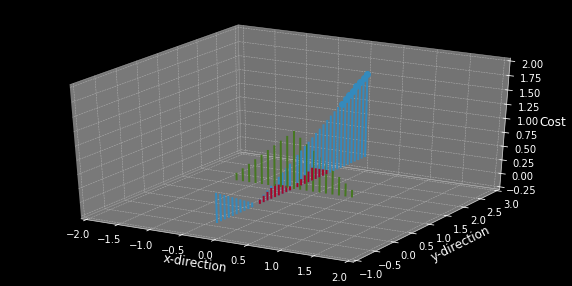

In [10]:
set_color_3d = lambda c: dict(color=c, marker='o', markeredgecolor=c, markevery=(0.1, 0.1))
x_proximity = maximum(0, 1 - abs(x))
figure()
ax = axes(projection='3d');
ax.set_xlabel('x-direction')
ax.set_ylabel('y-direction')
ax.set_zlabel('Cost')
for i in range(len(y)):        
    # Target lane cost
    line = mplot3d.art3d.Line3D(*zip((0, y[i], 0), (0, y[i], target_lane_cost[i])), **set_color_3d(b))
    ax.add_line(line)
    # Lane cost
    line = mplot3d.art3d.Line3D(*zip((0, y[i], 0), (0, y[i], lane_cost[i])), **set_color_3d(r))
    ax.add_line(line)
    # X-Proximity cost
    line = mplot3d.art3d.Line3D(*zip((x[i], 1, 0), (x[i], 1, x_proximity[i])), **set_color_3d(g))
    ax.add_line(line)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-1, 3)
ax.set_zlim3d(-0.25, 2);